In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from utide import solve
sys.path.append('/home/manu/TFG_repo/scripts')

In [4]:
from config import data_dir
from analysis_routines import *
from ploting_routines import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [5]:
temp, pres, date = load_time_series('processed/AGL_20181116_chain.nc')
# standard, as it should
df_s = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_s.csv')

# from 0 with a2 condition, if r condition is relaxed
df_c_b = load_SHDR_fit('a2_cond/AGL_20181116_fit_c.csv')
df_cr_b = load_SHDR_fit('a2_cond/AGL_20181116_fit_c_rel.csv')
df_ci_b = load_SHDR_fit('a2_cond/AGL_20181116_fit_ci.csv')

# continued with a2 conditioned relaxed
df_ci_c = load_SHDR_fit('a2_cond/continued/AGL_20181116_fit_ci_continued.csv')
df_c_c = load_SHDR_fit('a2_cond/continued/AGL_20181116_fit_c_continued.csv')

# continued with a2 free
df_fc_c = load_SHDR_fit('continued/AGL_20181116_fit_fc_cont.csv')
df_fci_c = load_SHDR_fit('continued/AGL_20181116_fit_fci_cont.csv')


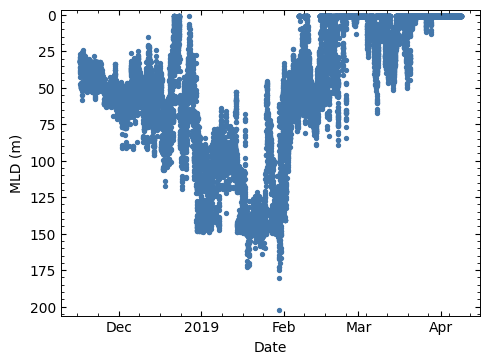

In [6]:
plot_fit_variable(df_c_c, 'D1', interval=timedelta(minutes=10))

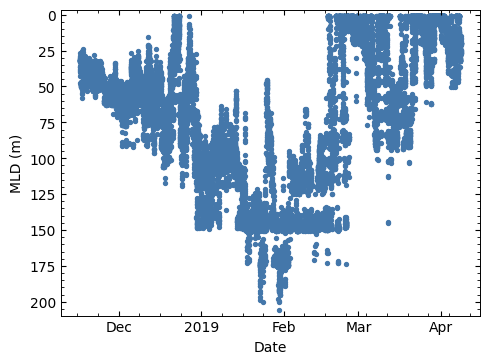

In [7]:
plot_fit_variable(df_fc_c, 'D1', interval=timedelta(minutes=10))

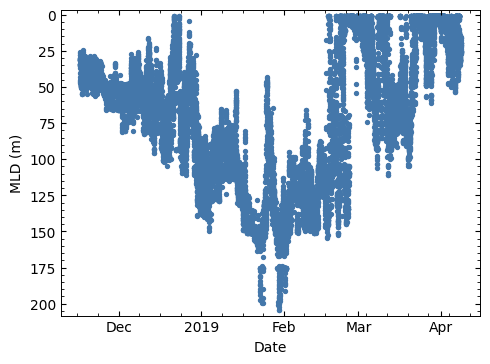

In [8]:
plot_fit_variable(df_fci_c, 'D1', interval=timedelta(minutes=10))

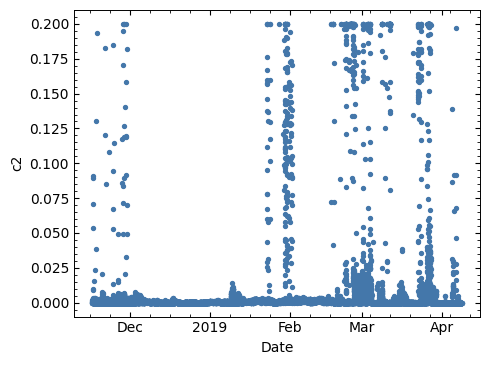

In [11]:
plot_fit_variable(df_fci_c, 'c2', interval=timedelta(minutes=10))

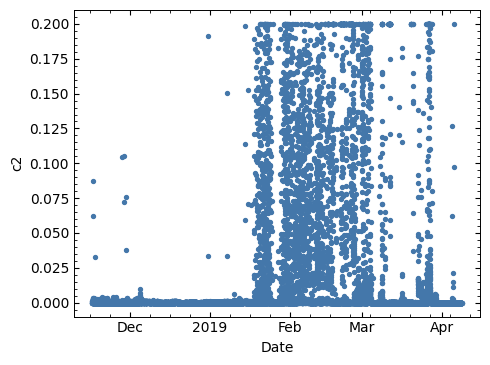

In [116]:
plot_fit_variable(df_s, 'c2', interval=timedelta(minutes=10))

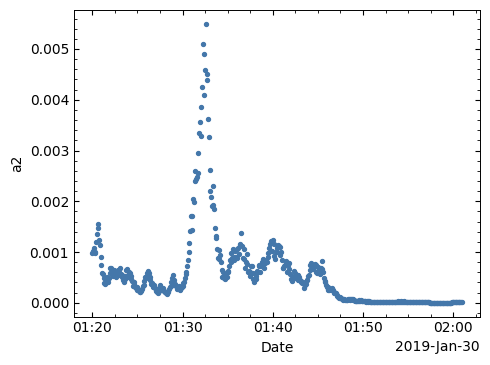

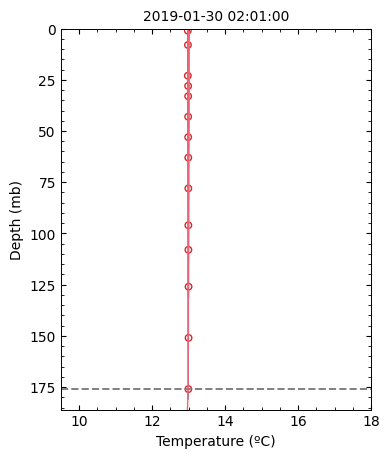

In [118]:
date_1 = datetime(2019, 1, 30, 1, 20)
date_2 = datetime(2019, 1, 30, 2, 1)
date_2_idx = date_to_idx(date, date_2)
plot_fit_variable(df_ci, 'a2', lims=[date_1, date_2])
plot_profile_fit(df_ci, temp, pres, date_2)

In [13]:
#utide
def coef_dataframe(date, value, lat=43.789):
    coef = solve(date, value, lat=lat, nodal=True, verbose=False)
    columns = ['A', 'A_ci', 'g', 'g_ci']
    data_dict = dict((k, coef[k]) for k in ['name', 'A', 'A_ci', 'g', 'g_ci', 'PE', 'SNR'] if k in coef)
    df = pd.DataFrame(data_dict)
    df.insert(1, 'period', 1/coef.aux['frq'])
    df.attrs['mean'] = coef.mean
    df.attrs['slope'] = coef.slope
    return df

def clean_coef_df(df):
    df = df[df['A_ci'] < df['A']]
    df = df[df['SNR'] >= 1.0]
    return df

In [14]:
i_f = date_to_idx(date, datetime(2019, 1, 1))
temp_u, date_u = temp[:i_f:6], date[:i_f:6]
df_u = df_fc_c[:i_f:6]

In [17]:
df_solve = coef_dataframe(date_u, df_u['D1'])
df_solve = clean_coef_df(df_solve)

In [18]:
df_solve

,name,period,A,A_ci,g,g_ci,PE,SNR
0,MSF,354.367067,9.229710,2.790775,212.872385,17.454780,47.569124,42.018321
1,M2,12.420601,6.057219,1.188002,33.811201,11.237037,20.487813,99.867554
2,MM,661.309192,3.964770,2.781402,77.315688,40.767514,8.777786,7.805858
3,L2,12.191620,3.423160,1.187653,34.382842,19.889562,6.543401,31.914440
4,UPS1,21.578237,2.430573,0.882171,217.509784,20.778752,3.298878,29.162467
5,O1,25.819342,1.749343,0.882762,25.569346,28.851015,1.708830,15.086020
6,OO1,22.306074,1.692742,0.882036,198.113782,29.840337,1.600039,14.148845
7,2Q1,28.006223,1.641014,0.881794,260.950198,30.789411,1.503743,13.304618
8,NO1,24.833248,1.627014,0.881606,104.706492,31.060954,1.478195,13.084156
9,ETA2,11.754522,1.370841,1.187930,130.425473,49.655137,1.049357,5.115690


In [15]:
locs = np.where(df_fci_c['b2'] > 0.19)[0]

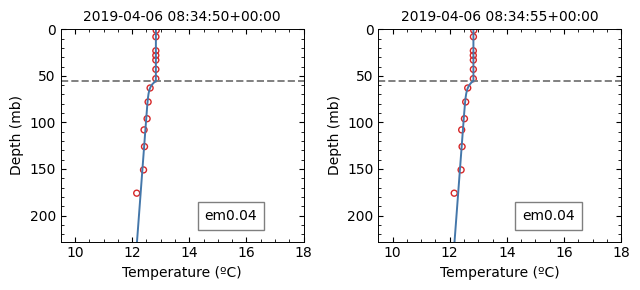

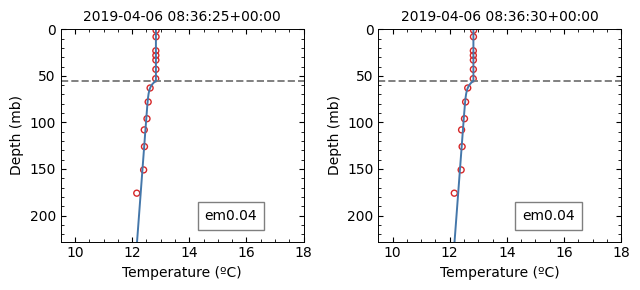

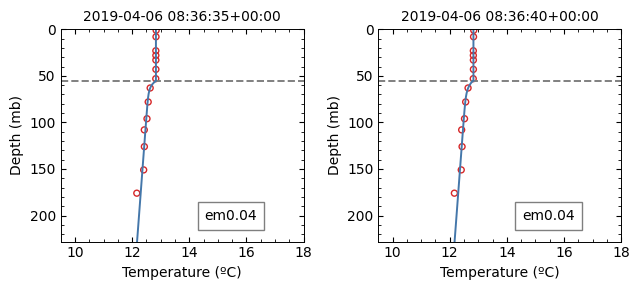

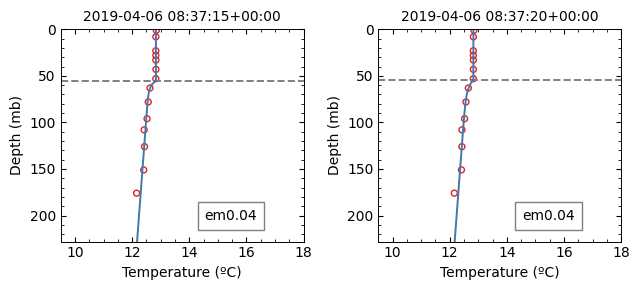

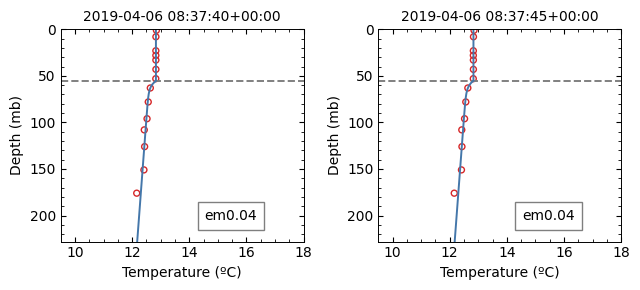

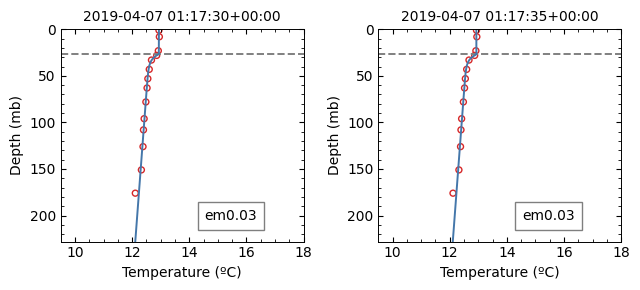

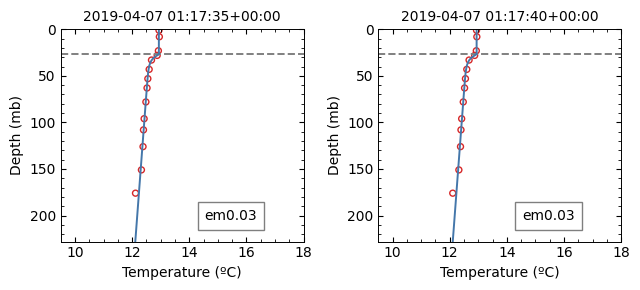

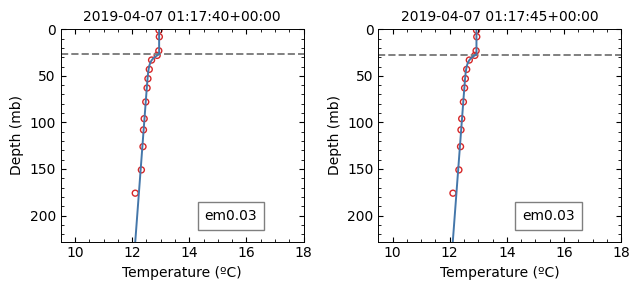

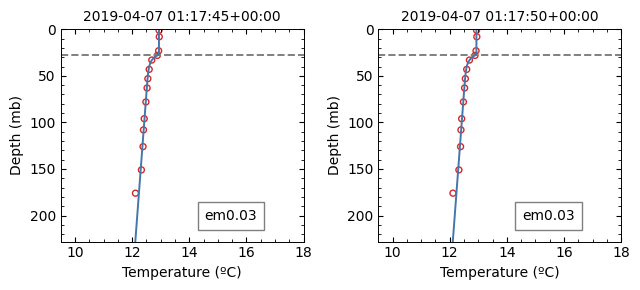

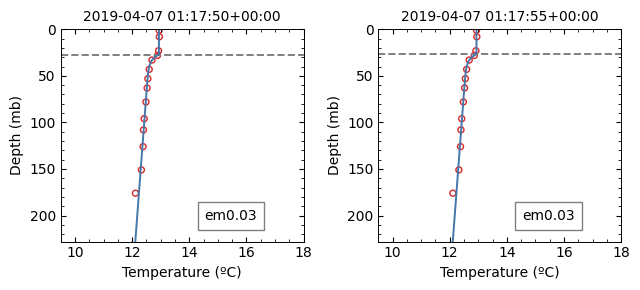

In [18]:
for loc in locs[-10:]:
    plot_multiple_profiles(df_fci_c, temp, pres, [loc, loc+1])

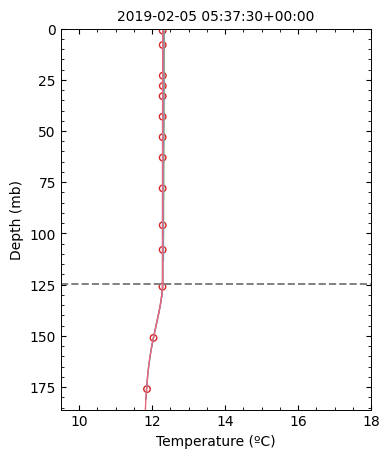

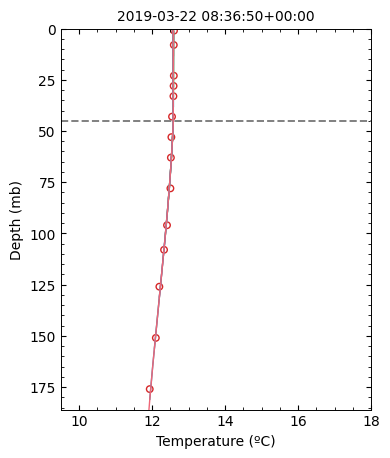

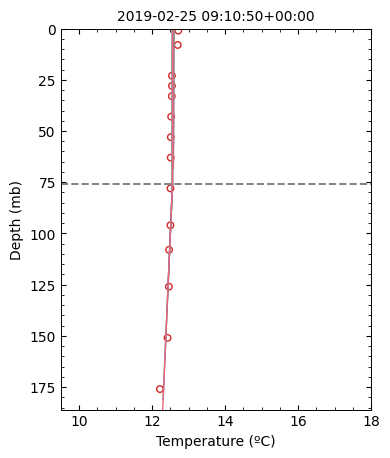

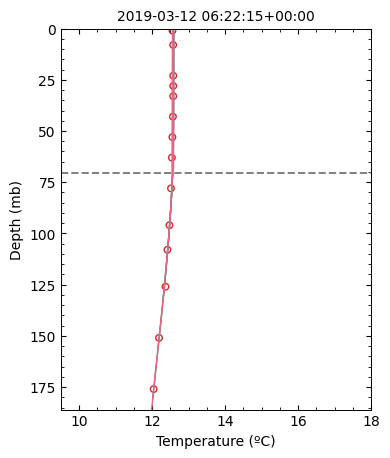

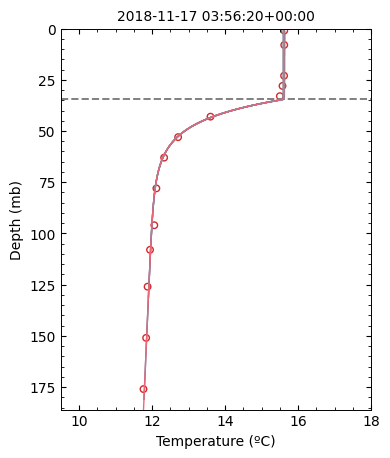

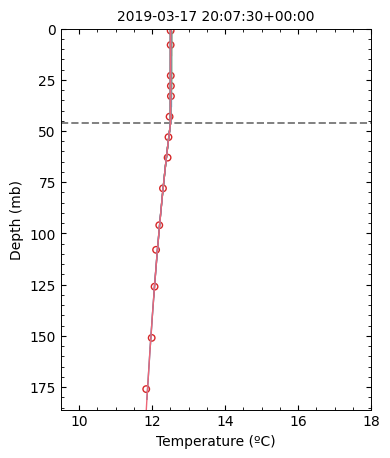

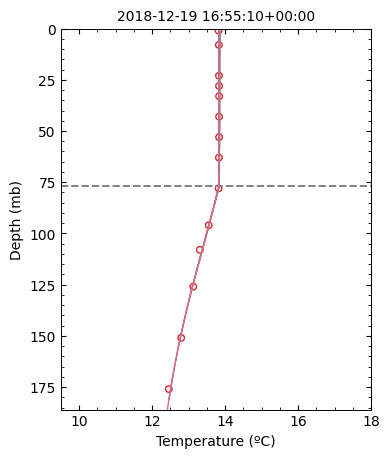

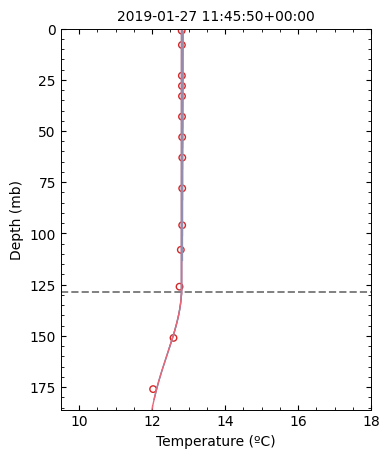

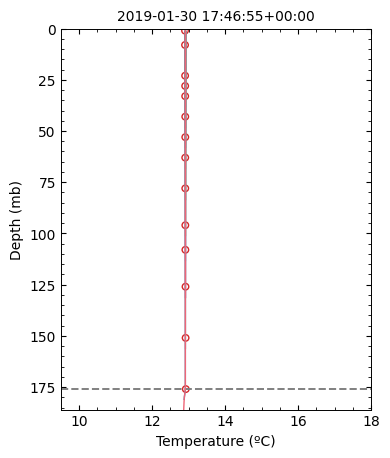

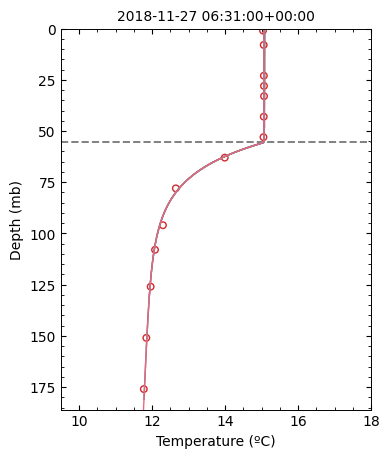

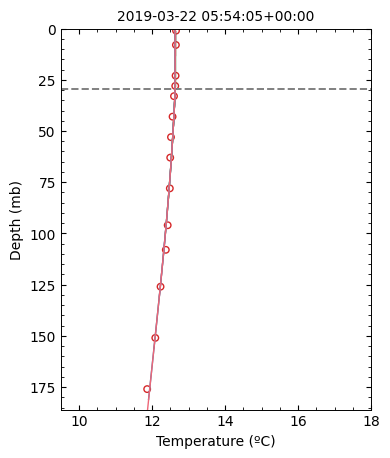

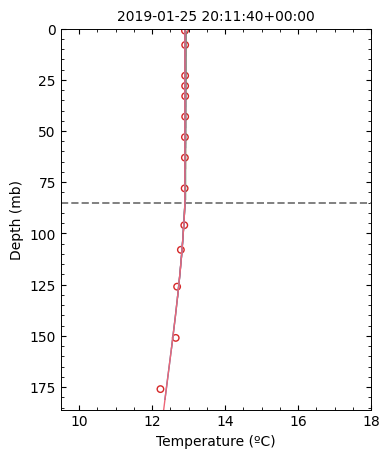

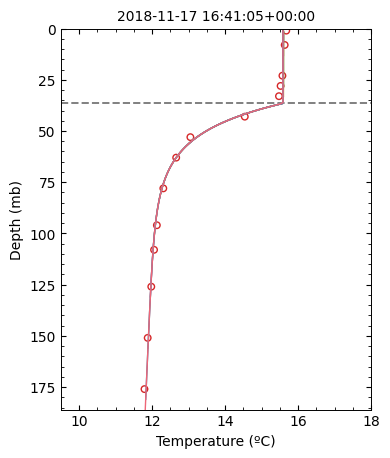

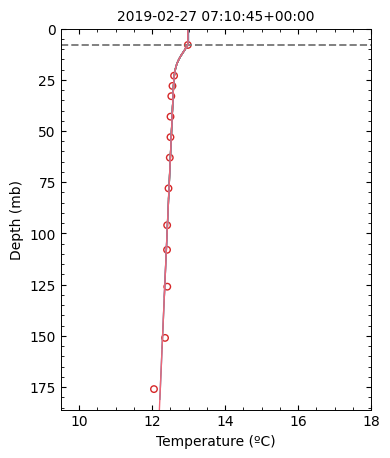

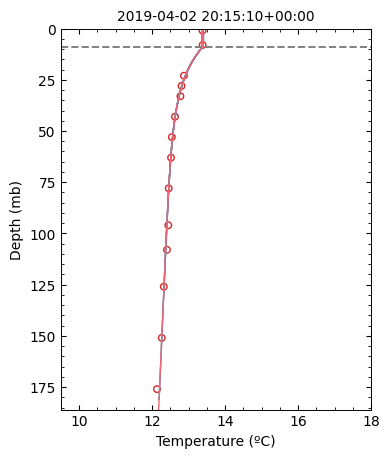

In [23]:
for i in np.random.uniform(0, len(date) -1, 15):
    plot_profile_fit(df_fci_c, temp, pres, int(i))